### Activity 1

- Aggregate data into one Data Frame using Pandas.
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates
- Replacing null values – Replace missing values with means of the column (for numerical columns)

In [2]:
import numpy as np
import pandas as pd

In [3]:
## import all files
customer_df1 = pd.read_csv('data/file1.csv')
customer_df2 = pd.read_csv('data/file2.csv')
customer_df3= pd.read_csv('data/file3.csv')

In [4]:
## define a function to make_heading_lowcase
def change_columns_header(df):
    df.columns = df.columns.str.lower()
    return df

## define a function that renames columns
def change_column_name(df, column_old_name, column_new_name):
    return df.rename(columns={column_old_name:column_new_name}, inplace= True)

## def a function that drops columns
def drop_columns(df, column_name):
    df.drop(columns=[column_name], inplace=True)
    return df

## defines function that rearranges columns based on list (here we will use list of headings from file1)
def rearrange_columns (df, list_of_new_column_names):
    df = df[list_of_new_column_names]
    return df

In [5]:
## change all headers to lower case
change_columns_header(customer_df1)
change_columns_header(customer_df2)
change_columns_header(customer_df3)

,customer,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [6]:
## change column names from st to state
change_column_name(customer_df1, 'st', 'state') ## fix discrepencies before rearranging to avoid error
change_column_name(customer_df2, 'st', 'state') 

In [7]:
## rearrange columns 
new_column_names = list (customer_df1.columns) ## create list of column headings based on file1
new_column_names
customer_df2 = rearrange_columns (customer_df2, new_column_names) ## apply defined function 
customer_df3 = rearrange_columns (customer_df3, new_column_names)

In [8]:
## concatenate and resetm index
customer_df = pd.concat([customer_df1, customer_df2, customer_df3], axis=0).reset_index(drop= True) 

In [9]:
## drop all % and reassign customer lifetime value
customer_df['customer lifetime value'] = customer_df['customer lifetime value'].replace({'%':''}, regex= True)
## change data type to float and round
customer_df['customer lifetime value'] = pd.to_numeric(customer_df['customer lifetime value'], errors='coerce')
customer_df['customer lifetime value'] = customer_df['customer lifetime value'].round(0)

In [10]:
## create a dictionary to equate useless data to useful data in complaints column
replacement_dict = {
    "1/0/00": "0",
    "1/1/00": "1",
    "1/2/00": "2",
    "1/3/00": "3",
    "1/4/00": "4",
    "1/5/00": "5"
}
customer_df["number of open complaints"] = customer_df["number of open complaints"].replace(replacement_dict)

In [11]:
## convert data to float
customer_df['number of open complaints'] = pd.to_numeric(customer_df['number of open complaints'], errors='coerce')

In [12]:
## create a dictionary that serves as an index for state names
replacement_dict_state = {
    'WA': 'Washington',
    'AZ': 'Arizona',
    'Cali': 'California'
}
## replace state names with created dictionary
customer_df["state"] = customer_df["state"].replace(replacement_dict_state)

In [13]:
## same as above to unify data in gender
replacement_dict_gender = {
    'Femal': 'Female',
    'female': 'Female',
    'M': 'Male',
    'F': 'Female'
}
customer_df["gender"] = customer_df["gender"].replace(replacement_dict_gender)

In [15]:
customer_df["gender"].value_counts()

Female    4607
Male      4408
Name: gender, dtype: int64

In [72]:
customer_df = customer_df.drop_duplicates() ## drop duplicates

In [73]:
drop_columns(customer_df, 'customer') ## drops customer column 

/Users/muhammad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697954.0,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.0,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.0,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536308.0,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23406.0,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3097.0,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8164.0,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.0,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [74]:
len(customer_df[customer_df['gender'].isna() == True]) ## finds out how many variables in gender are na

123

In [75]:
customer_df['gender'] = customer_df['gender'].fillna('Unknown') ## fill with unknownk as str

/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/2768309030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['gender'] = customer_df['gender'].fillna('Unknown') ## fill with unknownk as str


In [76]:
print(customer_df[customer_df['state'].isna() == True]) ## DELETE 1071

     state   gender education  customer lifetime value  income  \
1071   NaN  Unknown       NaN                      NaN     NaN   

      monthly premium auto  number of open complaints policy type  \
1071                   NaN                        NaN         NaN   

     vehicle class  total claim amount  
1071           NaN                 NaN  


In [77]:
print(customer_df[customer_df['number of open complaints'].isna() == True])

     state   gender education  customer lifetime value  income  \
1071   NaN  Unknown       NaN                      NaN     NaN   

      monthly premium auto  number of open complaints policy type  \
1071                   NaN                        NaN         NaN   

     vehicle class  total claim amount  
1071           NaN                 NaN  


<AxesSubplot:>

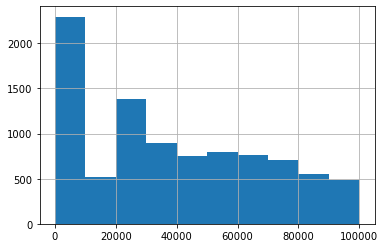

In [16]:
customer_df['income'].hist()

In [78]:
## function to replace na in open complaints with 0 
customer_df['number of open complaints'] = customer_df['number of open complaints'].fillna(0)

## function that replaces 0 income with mean 
customer_df['income'] = customer_df['income'].replace(0, customer_df['income'].mean()) 
## calculate mean on non zero income values first

/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/2588910188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['number of open complaints'] = customer_df['number of open complaints'].fillna(0)
/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/2588910188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['income'] = customer_df['income'].replace(0, customer_df['income'].mean())


In [79]:
## creates a function that replaces all null values with mean
def replace_null_mean (df_columns):
    df_columns = df_columns.fillna(df_columns.mean())
    return df_columns

In [80]:
## applies function
replace_null_mean(customer_df['customer lifetime value'])

replace_null_mean(customer_df['monthly premium auto'])

replace_null_mean(customer_df['total claim amount'])

0           2.704934
1        1131.464935
2         566.472247
3         529.881344
4          17.269323
            ...     
12069     198.234764
12070     379.200000
12071     790.784983
12072     691.200000
12073     369.600000
Name: total claim amount, Length: 9135, dtype: float64


### Activity 2

- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- Standardizing the data – Use string functions to standardize the text data (lower case)


In [81]:
## find out unique elements to begin standardization process
customer_df["state"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [82]:
## create a replacement dictionary
replacement_dict_region = {
    'Washington': 'East',
    'Arizona': 'Central',
    'Nevada': 'Central',
    'California': 'West',
    'Oregon': 'North West'
}
## applies dictionary to selected column
customer_df['state'] = customer_df['state'].replace(replacement_dict_region)

/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/4205552216.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['state'] = customer_df['state'].replace(replacement_dict_region)


In [83]:
customer_df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,East,Unknown,Master,NaN,37824.847055,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Central,Female,Bachelor,697954.0,37824.847055,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Central,Female,Bachelor,1288743.0,48767.000000,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,West,Male,Bachelor,764586.0,37824.847055,106.0,0.0,Corporate Auto,SUV,529.881344
4,East,Male,High School or Below,536308.0,36357.000000,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,West,Male,Bachelor,23406.0,71941.000000,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,West,Female,College,3097.0,21604.000000,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,West,Male,Bachelor,8164.0,37824.847055,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,West,Male,College,7524.0,21941.000000,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [84]:
## create a function that turns strings in column to lower case
def change_all_lower (df_column):
        df_column = df_column.str.lower()
        return df_column

In [85]:
(customer_df["state"]) = change_all_lower(customer_df['state'])
(customer_df["education"]) = change_all_lower(customer_df["education"])
(customer_df["gender"]) = change_all_lower(customer_df["gender"])
(customer_df["policy type"]) = change_all_lower(customer_df["policy type"])
(customer_df["vehicle class"]) = change_all_lower(customer_df["vehicle class"])


/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/106176228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (customer_df["state"]) = change_all_lower(customer_df['state'])
/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/106176228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (customer_df["education"]) = change_all_lower(customer_df["education"])
/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_75497/106176228.py:3: SettingWithCopyWarning: 
A value is tryin

In [86]:
customer_df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,east,unknown,master,NaN,37824.847055,1000.0,0.0,personal auto,four-door car,2.704934
1,central,female,bachelor,697954.0,37824.847055,94.0,0.0,personal auto,four-door car,1131.464935
2,central,female,bachelor,1288743.0,48767.000000,108.0,0.0,personal auto,two-door car,566.472247
3,west,male,bachelor,764586.0,37824.847055,106.0,0.0,corporate auto,suv,529.881344
4,east,male,high school or below,536308.0,36357.000000,68.0,0.0,personal auto,four-door car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,west,male,bachelor,23406.0,71941.000000,73.0,0.0,personal auto,four-door car,198.234764
12070,west,female,college,3097.0,21604.000000,79.0,0.0,corporate auto,four-door car,379.200000
12071,west,male,bachelor,8164.0,37824.847055,85.0,3.0,corporate auto,four-door car,790.784983
12072,west,male,college,7524.0,21941.000000,96.0,0.0,personal auto,four-door car,691.200000
